In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np 
import datetime as dt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/snap_food/Data analyst Task.csv") 

In [3]:
df 

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,7/31/2022,0,NaN,18000
29053,29054,9985,7/31/2022,0,NaN,25000
29054,29055,8843,7/31/2022,6000,1.0,24000
29055,29056,8703,7/31/2022,0,NaN,40000


In [4]:
df["created_at"] = pd.to_datetime(df["created_at"] , errors = "coerce" )

In [5]:
df 

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1.0,12000
1,2,2,2021-05-09,0,NaN,20000
2,3,3,2021-05-09,10000,1.0,14000
3,4,4,2021-11-10,0,NaN,15000
4,5,5,2021-11-10,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000
29053,29054,9985,2022-07-31,0,NaN,25000
29054,29055,8843,2022-07-31,6000,1.0,24000
29055,29056,8703,2022-07-31,0,NaN,40000


In [6]:
df = pd.DataFrame(df.groupby(["created_at","user_id"]).agg({'order_id':max , 'basket':sum})).reset_index() 

In [7]:
df 

,created_at,user_id,order_id,basket
0,2021-04-12,1,1,12000
1,2021-05-09,2,2,20000
2,2021-05-09,3,3,14000
3,2021-11-10,4,4,15000
4,2021-11-10,5,5,16000
...,...,...,...,...
28513,2022-07-31,9981,29031,24000
28514,2022-07-31,9982,29034,30000
28515,2022-07-31,9983,29036,21000
28516,2022-07-31,9984,29039,22000


In [8]:
df['tx_month'] = df['created_at'].apply(lambda x: dt.date(x.year, x.month,1))

In [9]:
df['acq_month'] = df.groupby('user_id')['tx_month'].transform('min')

In [10]:
df.tail(50)

,created_at,user_id,order_id,basket,tx_month,acq_month
28468,2022-07-31,9156,28953,24000,2022-07-01,2022-07-01
28469,2022-07-31,9204,28958,21000,2022-07-01,2022-07-01
28470,2022-07-31,9268,28897,11500,2022-07-01,2022-07-01
28471,2022-07-31,9283,28987,39000,2022-07-01,2022-07-01
28472,2022-07-31,9329,28995,35000,2022-07-01,2022-07-01
28473,2022-07-31,9370,28956,20800,2022-07-01,2022-07-01
28474,2022-07-31,9496,29017,50000,2022-07-01,2022-07-01
28475,2022-07-31,9558,28893,45000,2022-07-01,2022-07-01
28476,2022-07-31,9627,28934,45000,2022-07-01,2022-07-01
28477,2022-07-31,9796,29002,22500,2022-07-01,2022-07-01


In [11]:
def diff_month(x):

    d1 = x['tx_month']

    d2 = x["acq_month"]

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1


df['cohort_idx'] = df.apply(lambda x: diff_month(x), axis=1)


In [12]:
df.head(50)  

,created_at,user_id,order_id,basket,tx_month,acq_month,cohort_idx
0,2021-04-12,1,1,12000,2021-04-01,2021-04-01,1
1,2021-05-09,2,2,20000,2021-05-01,2021-05-01,1
2,2021-05-09,3,3,14000,2021-05-01,2021-05-01,1
3,2021-11-10,4,4,15000,2021-11-01,2021-11-01,1
4,2021-11-10,5,5,16000,2021-11-01,2021-11-01,1
5,2022-01-01,6,6,10000,2022-01-01,2022-01-01,1
6,2022-01-01,7,7,29500,2022-01-01,2022-01-01,1
7,2022-01-01,8,8,10000,2022-01-01,2022-01-01,1
8,2022-01-01,9,9,5000,2022-01-01,2022-01-01,1
9,2022-01-01,10,10,35000,2022-01-01,2022-01-01,1


In [13]:
def get_cohort_matrix(data, var='user_id', fun=pd.Series.nunique):

    cd = data.groupby(['acq_month', 'cohort_idx'])[var].apply(fun).reset_index()

    cc = cd.pivot_table(index = 'acq_month',

                        columns = 'cohort_idx',

                        values = var)

    cs = cc.iloc[:,0]

    retention = cc.divide(cs, axis = 0)

    retention = retention.round(3) * 100

    return cc, retention

In [14]:
cc, retention = get_cohort_matrix(df)

In [15]:
cc

cohort_idx,1,2,3,4,5,6,7,11,12,14,15
acq_month,,,,,,,,,,,
2021-04-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2021-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2021-11-01,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,1491.0,457.0,365.0,378.0,316.0,317.0,324.0,NaN,NaN,NaN,NaN
2022-02-01,1539.0,385.0,393.0,362.0,354.0,337.0,NaN,NaN,NaN,NaN,NaN
2022-03-01,1255.0,305.0,274.0,259.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,1592.0,421.0,389.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,1192.0,352.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,1396.0,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


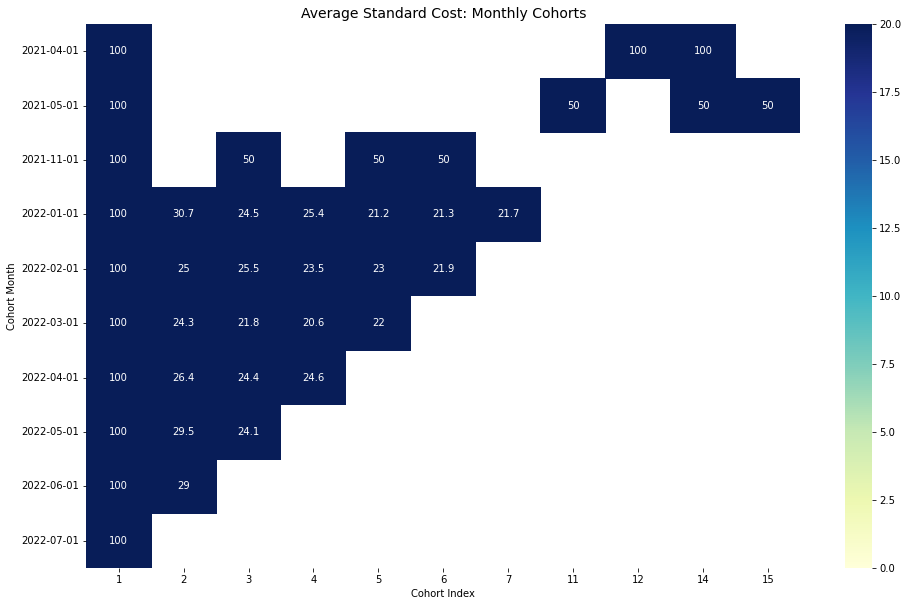

In [16]:
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention , annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [17]:
cc_sa, ret_sa = get_cohort_matrix( df, var='basket', fun=pd.Series.median )

cc_sa

cohort_idx,1,2,3,4,5,6,7,11,12,14,15
acq_month,,,,,,,,,,,
2021-04-01,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.0,6800.0,NaN
2021-05-01,17000.0,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,41000.0,15750.0
2021-11-01,15500.0,NaN,15500.0,NaN,27000.0,27600.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,18000.0,20000.0,20000.0,20000.0,21300.0,23750.0,24000.0,NaN,NaN,NaN,NaN
2022-02-01,18000.0,20000.0,20000.0,21000.0,24000.0,24000.0,NaN,NaN,NaN,NaN,NaN
2022-03-01,16750.0,20000.0,20000.0,21000.0,23375.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,20000.0,21500.0,22900.0,24000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,18000.0,20000.0,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,20000.0,24000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


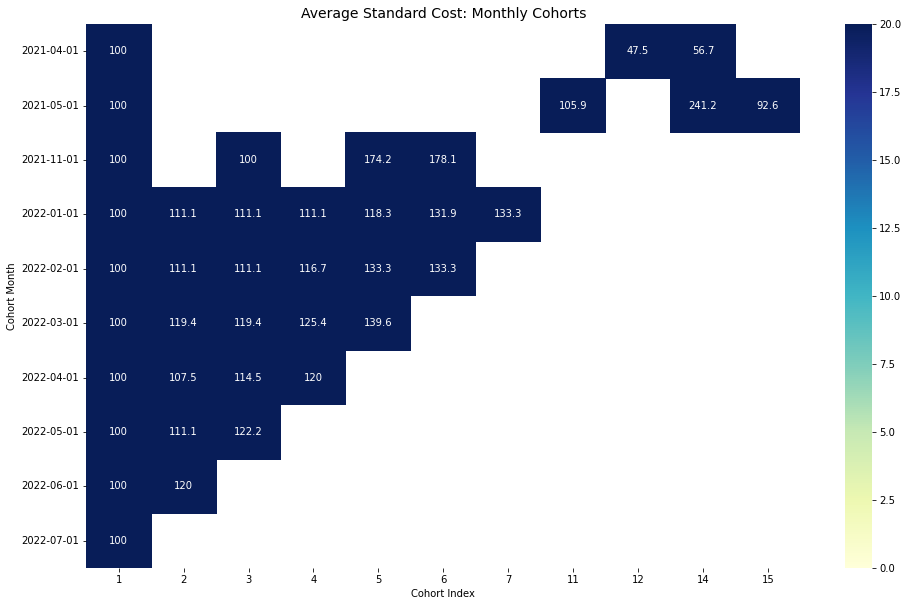

In [18]:
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(ret_sa , annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [19]:
df 

,created_at,user_id,order_id,basket,tx_month,acq_month,cohort_idx
0,2021-04-12,1,1,12000,2021-04-01,2021-04-01,1
1,2021-05-09,2,2,20000,2021-05-01,2021-05-01,1
2,2021-05-09,3,3,14000,2021-05-01,2021-05-01,1
3,2021-11-10,4,4,15000,2021-11-01,2021-11-01,1
4,2021-11-10,5,5,16000,2021-11-01,2021-11-01,1
...,...,...,...,...,...,...,...
28513,2022-07-31,9981,29031,24000,2022-07-01,2022-07-01,1
28514,2022-07-31,9982,29034,30000,2022-07-01,2022-07-01,1
28515,2022-07-31,9983,29036,21000,2022-07-01,2022-07-01,1
28516,2022-07-31,9984,29039,22000,2022-07-01,2022-07-01,1


In [20]:
df 

,created_at,user_id,order_id,basket,tx_month,acq_month,cohort_idx
0,2021-04-12,1,1,12000,2021-04-01,2021-04-01,1
1,2021-05-09,2,2,20000,2021-05-01,2021-05-01,1
2,2021-05-09,3,3,14000,2021-05-01,2021-05-01,1
3,2021-11-10,4,4,15000,2021-11-01,2021-11-01,1
4,2021-11-10,5,5,16000,2021-11-01,2021-11-01,1
...,...,...,...,...,...,...,...
28513,2022-07-31,9981,29031,24000,2022-07-01,2022-07-01,1
28514,2022-07-31,9982,29034,30000,2022-07-01,2022-07-01,1
28515,2022-07-31,9983,29036,21000,2022-07-01,2022-07-01,1
28516,2022-07-31,9984,29039,22000,2022-07-01,2022-07-01,1


In [21]:
df2 = pd.read_csv("/content/drive/MyDrive/snap_food/Data analyst Task.csv") 

In [22]:
df2

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,7/31/2022,0,NaN,18000
29053,29054,9985,7/31/2022,0,NaN,25000
29054,29055,8843,7/31/2022,6000,1.0,24000
29055,29056,8703,7/31/2022,0,NaN,40000


In [43]:
user_id_list = []
user_first_basket = []
user_first_discount = []
Date_Order = []

In [44]:
for i in range(len(df2)) : 
  if int(df2.loc[ i , "user_id" ]) not in  user_id_list : 
    user_id_list.append(df2.loc[ i , "user_id" ])
    user_first_basket.append(df2.loc[ i , "basket" ])
    user_first_discount.append(df2.loc[ i , "discount_cost" ])
    Date_Order.append(df2.loc[ i , "created_at" ])


In [45]:
df3 = pd.DataFrame()
df3["user_id"] = user_id_list 
df3["Date_First_order"] = Date_Order
df3["user_first_discount"] = user_first_discount 
df3["user_first_basket"] = user_first_basket

In [46]:
df3 

,user_id,Date_First_order,user_first_discount,user_first_basket
0,1,4/12/2021,10000,12000
1,2,5/9/2021,0,20000
2,3,5/9/2021,10000,14000
3,4,11/10/2021,0,15000
4,5,11/10/2021,10000,16000
...,...,...,...,...
9980,9981,7/31/2022,10000,24000
9981,9982,7/31/2022,0,30000
9982,9983,7/31/2022,0,21000
9983,9984,7/31/2022,0,22000


In [48]:
df3["Date_First_order"] = pd.to_datetime(df3["Date_First_order"])
df3['year'] = df3['Date_First_order'].dt.year 
df3['month'] = df3['Date_First_order'].dt.month 
df3['day'] = df3['Date_First_order'].dt.day


df3['dayofyear'] = pd.DatetimeIndex(df3['Date_First_order']).dayofyear 
df3['weekofyear'] = pd.DatetimeIndex(df3['Date_First_order']).weekofyear 
df3["dayofweek"]  = pd.DatetimeIndex(df3['Date_First_order']).dayofweek 
to_one_hot = pd.to_datetime(df3['dayofweek']).dt.day_name 
df3['is_month_start'] = pd.DatetimeIndex(df3['Date_First_order']).is_month_start
df3['is_month_end'] = pd.DatetimeIndex(df3['Date_First_order']).is_month_end 
df3 = pd.get_dummies(df3, columns=['is_month_start'], drop_first=True, prefix='m_start')
df3 = pd.get_dummies(df3, columns=['is_month_end'], drop_first=True, prefix='m_end')

<ipython-input-48-1049c466d093>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df3['weekofyear'] = pd.DatetimeIndex(df3['Date_First_order']).weekofyear


In [49]:
df3

,user_id,Date_First_order,user_first_discount,user_first_basket,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True
0,1,2021-04-12,10000,12000,2021,4,12,102,15,0,0,0
1,2,2021-05-09,0,20000,2021,5,9,129,18,6,0,0
2,3,2021-05-09,10000,14000,2021,5,9,129,18,6,0,0
3,4,2021-11-10,0,15000,2021,11,10,314,45,2,0,0
4,5,2021-11-10,10000,16000,2021,11,10,314,45,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9981,2022-07-31,10000,24000,2022,7,31,212,30,6,0,1
9981,9982,2022-07-31,0,30000,2022,7,31,212,30,6,0,1
9982,9983,2022-07-31,0,21000,2022,7,31,212,30,6,0,1
9983,9984,2022-07-31,0,22000,2022,7,31,212,30,6,0,1


In [50]:
df4 = df3.drop(["user_id","Date_First_order"] , axis = 1 )

In [51]:
df4

,user_first_discount,user_first_basket,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True
0,10000,12000,2021,4,12,102,15,0,0,0
1,0,20000,2021,5,9,129,18,6,0,0
2,10000,14000,2021,5,9,129,18,6,0,0
3,0,15000,2021,11,10,314,45,2,0,0
4,10000,16000,2021,11,10,314,45,2,0,0
...,...,...,...,...,...,...,...,...,...,...
9980,10000,24000,2022,7,31,212,30,6,0,1
9981,0,30000,2022,7,31,212,30,6,0,1
9982,0,21000,2022,7,31,212,30,6,0,1
9983,0,22000,2022,7,31,212,30,6,0,1


In [52]:
df4_corr = df4.corr()

In [53]:
df4_corr

,user_first_discount,user_first_basket,year,month,day,dayofyear,weekofyear,dayofweek,m_start_True,m_end_True
user_first_discount,1.000000,-0.044756,-0.003843,-0.020573,-0.036992,-0.024870,-0.011120,-0.006062,-0.023073,0.000303
user_first_basket,-0.044756,1.000000,0.009216,0.128992,0.029789,0.132119,0.116201,0.006764,-0.007638,0.015435
year,-0.003843,0.009216,1.000000,-0.035491,0.013240,-0.033526,-0.029962,-0.001555,0.004335,0.004119
month,-0.020573,0.128992,-0.035491,1.000000,0.008898,0.990015,0.853599,0.031669,0.024111,0.015086
day,-0.036992,0.029789,0.013240,0.008898,1.000000,0.149401,0.059056,-0.018887,-0.313707,0.314566
dayofyear,-0.024870,0.132119,-0.033526,0.990015,0.149401,1.000000,0.852426,0.029001,-0.020527,0.059484
weekofyear,-0.011120,0.116201,-0.029962,0.853599,0.059056,0.852426,1.000000,0.060377,0.144559,0.047857
dayofweek,-0.006062,0.006764,-0.001555,0.031669,-0.018887,0.029001,0.060377,1.000000,0.024278,-0.051705
m_start_True,-0.023073,-0.007638,0.004335,0.024111,-0.313707,-0.020527,0.144559,0.024278,1.000000,-0.035637
m_end_True,0.000303,0.015435,0.004119,0.015086,0.314566,0.059484,0.047857,-0.051705,-0.035637,1.000000


In [59]:
print(df4_corr["user_first_basket"])

user_first_discount   -0.044756
user_first_basket      1.000000
year                   0.009216
month                  0.128992
day                    0.029789
dayofyear              0.132119
weekofyear             0.116201
dayofweek              0.006764
m_start_True          -0.007638
m_end_True             0.015435
Name: user_first_basket, dtype: float64


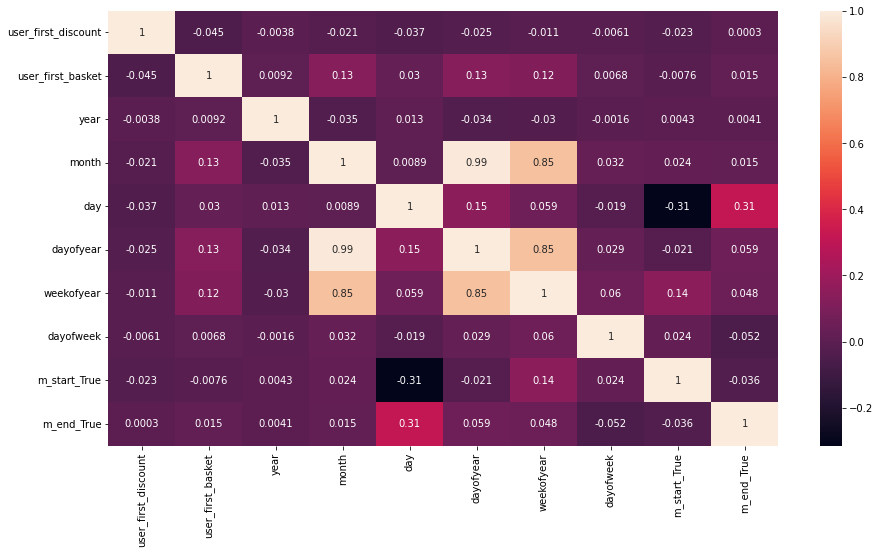

In [58]:
plt.figure(figsize = (15 , 8 ))
sns.heatmap(df4_corr , annot = True ) 

In [61]:
df2["created_at"] = pd.to_datetime(df2["created_at"])

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1.0,12000
1,2,2,2021-05-09,0,NaN,20000
2,3,3,2021-05-09,10000,1.0,14000
3,4,4,2021-11-10,0,NaN,15000
4,5,5,2021-11-10,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000
29053,29054,9985,2022-07-31,0,NaN,25000
29054,29055,8843,2022-07-31,6000,1.0,24000
29055,29056,8703,2022-07-31,0,NaN,40000


In [63]:
df2["created_at"] = pd.to_datetime(df2["created_at"])
df2['year'] = df2['created_at'].dt.year 
df2['month'] = df2['created_at'].dt.month 
df2['day'] = df2['created_at'].dt.day 

In [64]:
df2 

,order_id,user_id,created_at,discount_cost,discount_type,basket,year,month,day
0,1,1,2021-04-12,10000,1.0,12000,2021,4,12
1,2,2,2021-05-09,0,NaN,20000,2021,5,9
2,3,3,2021-05-09,10000,1.0,14000,2021,5,9
3,4,4,2021-11-10,0,NaN,15000,2021,11,10
4,5,5,2021-11-10,10000,1.0,16000,2021,11,10
...,...,...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000,2022,7,31
29053,29054,9985,2022-07-31,0,NaN,25000,2022,7,31
29054,29055,8843,2022-07-31,6000,1.0,24000,2022,7,31
29055,29056,8703,2022-07-31,0,NaN,40000,2022,7,31


In [65]:
unique_user = df2["user_id"].unique()

In [ ]:
for i in unique_user : 
  

In [143]:
Total_dict = {
              "user_id" : [] , 
              "Buy1" : [] , 
              "Buy2" : []  , 
              "Buy3" : [] , 
              
              }
unique_user = df2["user_id"].unique()
every_body = []
for i in unique_user :
  every_body.append(i)
  list_data_person = []
  for index , j in enumerate(df2.loc[ : , "user_id" ])  :
    if i == j :
      year  = df2.iloc[ index , 6 ]
      month = df2.iloc[ index , 7 ]
      day   = df2.iloc[ index , 8 ]
      s = 0 
      if year == 2021 : 
        if month < 7 : 
          s += month * 31 + day 
        elif month > 6 and month < 13 : 
          s += month * 30 + day 

      else : 
        s += 365 

        if month < 7 : 
          s += month * 31 + day 

        elif month > 6 and month < 13 : 
          s += month * 30 + day 
      list_data_person.append(s)



   


  buy_1 = 0 
  buy_2 = 0
  buy_3 = 0 

  for index2 , j2 in enumerate(list_data_person[:-1]) : 
    diff = list_data_person[index2 + 1 ] - j2 
     
    if index2 == 0 : buy_1 = diff 

    elif index2 == 1 : buy_2 = diff 
    elif index2 == 2 : buy_3 = diff
  


  



  Total_dict["user_id"].append(i)
  Total_dict["Buy1"].append(buy_1)
  Total_dict["Buy2"].append(buy_2)
  Total_dict["Buy3"].append(buy_3)   
 

   


In [128]:
every_body

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [129]:
list_data_person

[606]

In [126]:
529-489

40

In [115]:
buy_1

350

In [116]:
buy_2 

3

In [144]:
d2_new = pd.DataFrame(Total_dict)

In [145]:
d2_new

,user_id,Buy1,Buy2,Buy3
0,1,350,3,40
1,2,391,0,0
2,3,322,106,1
3,4,130,28,0
4,5,74,0,0
...,...,...,...,...
9980,9981,0,0,0
9981,9982,0,0,0
9982,9983,0,0,0
9983,9984,0,0,0


In [146]:
def Calc_Rate() : 
  f = []
  s = []
  if d2_new["Buy2"] == 0 :
     f.append(0)
  else : 
     f.append( d2_new["Buy1"] / d2_new["Buy2"] )


  if d2_new["Buy3"] == 0 :
     s.append(0)
  else : 
     s.append(d2_new["Buy2"] / d2_new["Buy3"] )

  d2_new["Buy1 / Buy 2 "] = f 
  d2_new["Buy2 / Buy 3 "] = s 



In [147]:
d2_new 

,user_id,Buy1,Buy2,Buy3
0,1,350,3,40
1,2,391,0,0
2,3,322,106,1
3,4,130,28,0
4,5,74,0,0
...,...,...,...,...
9980,9981,0,0,0
9981,9982,0,0,0
9982,9983,0,0,0
9983,9984,0,0,0


In [148]:
Calc_Rate()

ValueError: ignored

In [142]:
d2_new["Buy1 / Buy 2 "] = d2_new["Buy1"] / d2_new["Buy2"] 

In [133]:
d2_new["Buy2 / Buy 3 "] = d2_new["Buy2"] / ( d2_new["Buy3"] + 0.00000000001 ) 

In [134]:
d2_new

,user_id,Buy1,Buy2,Buy3,Buy1 / Buy 2,Buy2 / Buy 3
0,1,350,3,40,116.666667,7.500000e-02
1,2,391,0,0,inf,0.000000e+00
2,3,322,106,1,3.037736,1.060000e+02
3,4,130,28,0,4.642857,2.800000e+12
4,5,74,0,0,inf,0.000000e+00
...,...,...,...,...,...,...
9980,9981,0,0,0,NaN,0.000000e+00
9981,9982,0,0,0,NaN,0.000000e+00
9982,9983,0,0,0,NaN,0.000000e+00
9983,9984,0,0,0,NaN,0.000000e+00
